In [206]:
import pandas as pd

# Load annotations

In [602]:
df_rayyan_to_pmid = pd.read_csv("./data/rayyan_to_pmid_258.csv")[['pmid','pmid_from_doi']]
df_rayyan_to_pmid.shape

(258, 2)

In [604]:
df_rayyan_to_pmid_manual = pd.read_csv("./data/rayyan_to_pmid_6_manual_pmid.csv")[['pmid','pmid_from_doi']]
df_rayyan_to_pmid_manual.shape

(6, 2)

In [606]:
df_rayyan_to_pmid = pd.concat([df_rayyan_to_pmid, df_rayyan_to_pmid_manual]).drop_duplicates().reset_index(drop=True)
df_rayyan_to_pmid.shape

(264, 2)

In [608]:
# List of file paths
file_paths = ["data/study_type_teller/test.csv", "data/study_type_teller/train.csv", "data/study_type_teller/val.csv"]  # Replace with actual file names

# Read and concatenate all files
df_list = [pd.read_csv(file) for file in file_paths]
df_stt = pd.concat(df_list, ignore_index=True)
print(df_stt.shape)

# make sure all rayyan cases are replace with PMID
df_merged = df_stt.merge(df_rayyan_to_pmid[['pmid','pmid_from_doi']], on="pmid", how="left")
df_merged["pmid"] = df_merged["pmid_from_doi"].combine_first(df_merged["pmid"])
df_merged.drop(columns=["pmid_from_doi"], inplace=True)
df_merged_rayyan = df_merged[df_merged['pmid'].astype(str).str.contains('rayyan', case=False, na=False)]
df_merged = df_merged[~df_merged['pmid'].astype(str).str.contains('rayyan', case=False, na=False)]
print(df_merged.shape)

df_merged["pmid"] = df_merged["pmid"].astype(int)
df_stt = df_merged.rename(columns={'pmid': 'PMID'})

df_stt.head()

(2645, 8)
(2645, 8)


,idx,PMID,journal_name,title,abstract,accepted_label,multi_label,binary_label
0,1,12047012,Schizophrenia bulletin,Can clinical practice guide a research agenda?,Articles from this issue of the Bulletin indic...,Non-systematic-review,1,0
1,2,28832188,Future medicinal chemistry,Dual/multitargeted xanthone derivatives for Al...,"To date, the current therapy for Alzheimer's d...",Non-systematic-review,1,0
2,3,17678496,Expert review of neurotherapeutics,Benefits of occupational therapy in stroke reh...,Stroke is the largest single cause of severe p...,Non-systematic-review,1,0
3,4,25649308,Annals of the New York Academy of Sciences,The promise of ketamine for treatment-resistan...,Major depressive disorder (MDD) is one of the ...,Non-systematic-review,1,0
4,5,6312596,La semaine des hopitaux : organe fonde par l'A...,[Clinical and pathogenic aspects of secondary ...,The secondary hyperlipoproteinemias are freque...,Non-systematic-review,1,0


In [614]:
mt_ref = pd.read_csv("data/multi_tagger/MultiTagger_Scorefile_layout.csv")

In [616]:
df_thresholds = mt_ref.set_index('Column Headers in tsv').T
df_thresholds.columns = df_thresholds.columns.str.title()

df_thresholds

Column Headers in tsv,Pmid,Autobiography,Bibliography,Biography,Case-Control Studies,Case Reports,Clinical Studies As Topic,Clinical Study,Cohort Studies,Comment,...,Prospective Studies,Random Allocation,Randomized Controlled Trial,Reproducibility Of Results,Retrospective Studies,Review,Systematic Reviews As Topic,Systematic Review,Twin Study,Validation Study
threshold having optimal F1,NaN,0.3738,1.0,0.5,0.2928,0.4913,0.834,0.363,0.2347,0.4912,...,0.4063,0.1339,0.2197,0.2767,0.3971,0.4624,0.0622,0.9406,0.4,0.3276


In [618]:
df_scores_1 = pd.read_csv('data/multi_tagger/multitagger_filtered_data_table_1_20250206.csv')
df_scores_1.shape

(2254, 50)

In [620]:
df_scores_2 = pd.read_csv('data/multi_tagger/multitagger_filtered_data_table_2_20250206.csv')
df_scores_2.shape

(378, 50)

In [622]:
df_scores_2

,PMID,Autobiography,Bibliography,Biography,Case-Control Studies,Case Reports,Clinical Studies as Topic,Clinical Study,Cohort Studies,Comment,...,Prospective Studies,Random Allocation,Randomized Controlled Trial,Reproducibility of Results,Retrospective Studies,Review,Systematic Reviews as Topic,Systematic Review,Twin Study,Validation Study
0,31387390,0.00000,0.00000,0.00000,0.01430,0.00210,0.02300,0.2712,0.00560,0.00015,...,0.0200,0.00450,0.15770,0.0027,0.0248,0.00130,0.00003,0.00000,0.00001,0.00061
1,33034830,0.00000,0.00000,0.00000,0.02680,0.00140,0.00052,0.0385,0.01060,0.00015,...,0.0240,0.00400,0.00290,0.0150,0.0628,0.00130,0.00000,0.00000,0.00003,0.00023
2,33689290,0.00005,0.00002,0.00007,0.00072,0.00420,0.02300,0.0056,0.00560,0.00037,...,0.0084,0.00049,0.00084,0.0131,0.0054,0.02250,0.00004,0.00002,0.00002,0.00023
3,33937180,0.00027,0.00000,0.00010,0.00390,0.00520,0.02250,0.0078,0.00300,0.00670,...,0.0200,0.00099,0.00084,0.0097,0.0052,0.19810,0.00004,0.00000,0.00003,0.00054
4,34034790,0.00000,0.00000,0.00000,0.00015,0.00016,0.10570,0.9933,0.00042,0.00015,...,0.4767,0.00100,0.91140,0.0027,0.0015,0.00130,0.00000,0.00027,0.00001,0.00006
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
373,35757429,0.00003,0.00000,0.00001,0.00150,0.00520,0.01400,0.0138,0.00490,0.00270,...,0.0018,0.00036,0.00054,0.0978,0.0041,0.33530,0.00003,0.00000,0.00016,0.00077
374,36148759,0.00000,0.00000,0.00000,0.00072,0.00049,0.00080,0.0857,0.00220,0.00015,...,0.0088,0.05240,0.00058,0.0227,0.0014,0.00071,0.00000,0.00000,0.00020,0.00077
375,36889489,0.00000,0.00000,0.00001,0.02030,0.00100,0.00480,0.0603,0.00240,0.00037,...,0.0064,0.03680,0.00560,0.0074,0.0059,0.05440,0.00003,0.00002,0.00016,0.00022
376,37096339,0.00000,0.00000,0.00680,0.00015,0.00230,0.02250,0.0000,0.00069,0.00270,...,0.0013,0.00099,0.00006,0.1460,0.0041,0.96710,0.06220,1.00000,0.00002,0.00006


In [624]:
df_scores_3 = pd.read_csv('data/multi_tagger/multitagger_filtered_data_table_3_20250206.csv')
df_scores_3 = df_scores_3.rename(columns={'pmid': 'PMID'})
df_scores_3.columns = df_scores_3.columns.str.title()

df_scores_3.shape

(13, 50)

In [626]:
df_scores_1_2 = pd.concat([df_scores_1, df_scores_2]).drop_duplicates().reset_index(drop=True)
df_scores_1_2.columns = df_scores_1_2.columns.str.title()

print(df_scores_1_2.shape)
df_scores = pd.concat([df_scores_1_2, df_scores_3]).drop_duplicates().reset_index(drop=True)
df_scores = df_scores.rename(columns={'Pmid': 'PMID'})

df_scores.shape

(2632, 50)


(2645, 50)

In [628]:
df_scores

,PMID,Autobiography,Bibliography,Biography,Case-Control Studies,Case Reports,Clinical Studies As Topic,Clinical Study,Cohort Studies,Comment,...,Prospective Studies,Random Allocation,Randomized Controlled Trial,Reproducibility Of Results,Retrospective Studies,Review,Systematic Reviews As Topic,Systematic Review,Twin Study,Validation Study
0,26081580,0.00000,0.00000,0.00000,0.00045,0.00049,0.00610,0.9537,0.00013,0.00023,...,0.0200,0.00032,0.78320,0.00072,0.0204,0.0013,0.00000,0.00002,0.00004,0.00013
1,25971300,0.00000,0.00000,0.00000,0.01430,0.00016,0.00110,0.0598,0.00300,0.00062,...,0.0249,0.00400,0.00320,0.00740,0.0677,0.0025,0.00000,0.00002,0.00004,0.00051
2,25978940,0.00000,0.00000,0.00000,0.00170,0.00130,0.00220,0.0501,0.00880,0.00015,...,0.0026,0.00032,0.00054,0.00270,0.0316,0.0013,0.00000,0.00870,0.00004,0.00022
3,25867960,0.00000,0.00000,0.00001,0.00610,0.00033,0.00110,0.0834,0.00240,0.00059,...,0.0200,0.00190,0.01050,0.08210,0.0054,0.0121,0.00000,0.00000,0.00004,0.00077
4,25856530,0.00000,0.00000,0.00000,0.03790,0.85830,0.00480,0.0385,0.00880,0.00015,...,0.0026,0.00400,0.00320,0.00330,0.0112,0.0121,0.00000,0.00000,0.00016,0.00054
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2640,37918702,0.00003,0.00002,0.00001,0.00290,0.00064,0.00610,0.0056,0.00490,0.00023,...,0.0064,0.05240,0.00054,0.11210,0.0059,0.0490,0.00003,0.00000,0.00016,0.00054
2641,38122903,0.00005,0.00002,0.00018,0.00600,0.00100,0.00220,0.0060,0.00490,0.00037,...,0.0013,0.00099,0.00033,0.00099,0.0013,0.0385,0.00000,0.00002,0.00043,0.00022
2642,38212353,0.00000,0.00000,0.00000,0.00093,0.00100,0.12480,0.4424,0.00042,0.00023,...,0.0053,0.00720,0.51690,0.00200,0.0054,0.0017,0.00000,0.00000,0.00002,0.00013
2643,38029664,0.00000,0.00000,0.00007,0.00170,0.00049,0.00052,0.0060,0.00300,0.00015,...,0.0013,0.02500,0.00120,0.01120,0.0052,0.0025,0.00003,0.00000,0.00004,0.00061


In [714]:
# Initialize an empty list to store each row's result
filtered_rows = []
use_threshold = False

# Iterate over each row in df_scores
for index, row in df_scores.iterrows():
    labels_above_threshold = []
    highest_score_label = None
    highest_score = -1  # Initialize with a very low score
    
    # Iterate over each label (column) in df_scores (excluding 'PMID')
    for topic in df_scores.columns[1:]:
        score = row[topic]
        threshold = df_thresholds[topic].values[0]  # Get the threshold for the label
        
        # Compare score to threshold
        if score >= threshold:
            labels_above_threshold.append(topic)
        # Keep track of the highest score if no labels pass the threshold
        if score > highest_score:
            highest_score = score
            highest_score_label = topic
    
    # If no labels are above the threshold, pick the one with the highest score
    if not labels_above_threshold:
        if use_threshold:
            labels_above_threshold.append('not_assigned')
        else:
            labels_above_threshold.append(highest_score_label)
    
    # Append the result to the filtered rows list
    filtered_rows.append({'PMID': row['PMID'], 'labels_multitagger': ',\n '.join(labels_above_threshold)})

# Convert the list of results to a DataFrame
filtered_labels_df = pd.DataFrame(filtered_rows)


In [716]:
filtered_labels_df.head()

,PMID,labels_multitagger
0,26081580.0,"Clinical Study,\n Randomized Controlled Trial"
1,25971300.0,Retrospective Studies
2,25978940.0,Cross-Sectional Studies
3,25867960.0,Clinical Study
4,25856530.0,Case Reports


In [718]:
filtered_labels_df['PMID'] = filtered_labels_df['PMID'].astype(int)
df_stt['PMID'] = df_stt['PMID'].astype(int)

merged_sdd_mt = pd.merge(filtered_labels_df, df_stt, how="left", on="PMID")


In [720]:
merged_sdd_mt.head()

,PMID,labels_multitagger,idx,journal_name,title,abstract,accepted_label,multi_label,binary_label
0,26081580,"Clinical Study,\n Randomized Controlled Trial",515,BMC Psychiatry,Narrative exposure therapy for immigrant child...,BACKGROUND: Millions of children worldwide suf...,Clinical-study-protocol,12,0
1,25971300,Retrospective Studies,1057,Journal of the National Cancer Institute,FGL2 as a Multimodality Regulator of Tumor-Med...,Fibrinogen-like protein 2 (FGL2) may promote g...,Animal-drug-intervention,6,1
2,25978940,Cross-Sectional Studies,596,European journal of paediatric neurology : EJP...,Pain in adolescents with spinal muscular atrop...,The purpose of this study was to explore the p...,Remaining,0,0
3,25867960,Clinical Study,1391,J Vis Exp,The forced swim test as a model of depressive-...,The goal of the present protocol is to describ...,Animal-other,5,1
4,25856530,Case Reports,350,Cochlear implants international,Improving behavior using child-directed intera...,Children with hearing loss (HL) are at increas...,Human-non-RCT-non-drug-intervention,2,0


# Plotting

In [723]:
import matplotlib.pyplot as plt

def plot_top_labels(df, column, top_n=20, 
                    title="Top Predicted Labels", 
                    xlabel="Number of Abstracts", 
                    ylabel="Label", 
                    color='#4c72b0', 
                    fontsize=16, save=False):
    """
    Plots a horizontal bar chart of the top N most frequent labels in a specified DataFrame column.

    Parameters:
    - df (pd.DataFrame): DataFrame containing the data.
    - column (str): Column name to analyze and count values from.
    - top_n (int): Number of top labels to display (default is 20).
    - title (str): Title of the plot.
    - xlabel (str): Label for the x-axis.
    - ylabel (str): Label for the y-axis.
    - color (str): Color for the bars.
    - fontsize (int): Base font size for labels and title.
    """

    # Get the top N label counts, sorted in ascending order for better visualization
    labels_count = df[column].value_counts().head(top_n).sort_values()

    # Create the figure and bar plot
    plt.figure(figsize=(10, 7))
    ax = labels_count.plot(kind='barh', color=color, edgecolor='black', alpha=0.85, zorder=2)

    # Set axis labels and title with improved styling
    plt.xlabel(xlabel, fontsize=fontsize, fontweight='bold', labelpad=10)
    plt.ylabel('', fontsize=fontsize, fontweight='bold', labelpad=10)
    plt.title(title, fontsize=fontsize + 2, fontweight='bold', pad=15)

    # Customize tick labels
    ax.tick_params(axis='x', labelsize=15)
    ax.tick_params(axis='y', labelsize=16)

    # Add count labels inside the bars for a cleaner look
    for i, count in enumerate(labels_count):
        ax.text(count + (max(labels_count) * 0.01), i, f'{count:,}', 
                va='center', fontsize=15, color='black'), #fontweight='bold')

    # Add a subtle grid for readability
    ax.grid(axis='x', linestyle='--', alpha=0.5, color='gray', zorder=0)

    # Remove top and right spines for a cleaner aesthetic
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

    plt.tight_layout()
    if save:
        plt.savefig(f"./viz/study_type_teller/multitagger_label_{title.lower().replace(" ","_")}.pdf")
    plt.show()


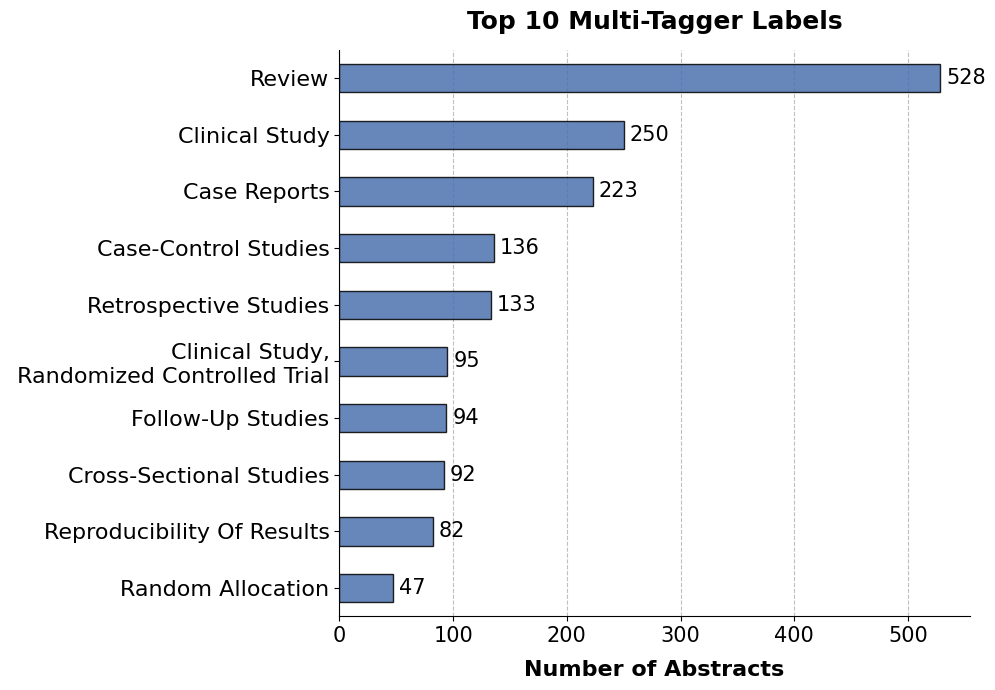

In [727]:
if use_threshold:
    title_text = "Top 10 Multi-Tagger Labels (threshold)"
else:
    title_text = "Top 10 Multi-Tagger Labels"
plot_top_labels(merged_sdd_mt, 'labels_multitagger', top_n=10,  title=title_text, save=True)

In [556]:
df_predictions_stt_remaining = merged_sdd_mt[merged_sdd_mt['accepted_label'] == "Remaining"]


In [645]:
df_predictions_stt_remaining.head()

,PMID,labels_multitagger,idx,journal_name,title,abstract,accepted_label,multi_label,binary_label
2,25978940,Cross-Sectional Studies,596,European journal of paediatric neurology : EJP...,Pain in adolescents with spinal muscular atrop...,The purpose of this study was to explore the p...,Remaining,0,0
8,24526470,Clinical Study,463,Journal of religion and health,Sense of purpose in life and escape from self ...,Depression is a leading mental disorder from w...,Remaining,0,0
10,724830,Cross-Sectional Studies,682,"Psychiatrie, Neurologie, und medizinische Psyc...",[Personality structure and the psychopathologi...,Following the examination of 50 young persons ...,Remaining,0,0
11,740190,Retrospective Studies,603,Neuroradiology,[CT scan in Wilson's disease (author's transl)].,We studied nine cases of Wilson's disease on C...,Remaining,0,0
12,755870,Clinical Study,317,Journal of behavioral medicine,Perceived Somatic Response Inventory: three sc...,Studies of autonomic reactivity and of volunta...,Remaining,0,0


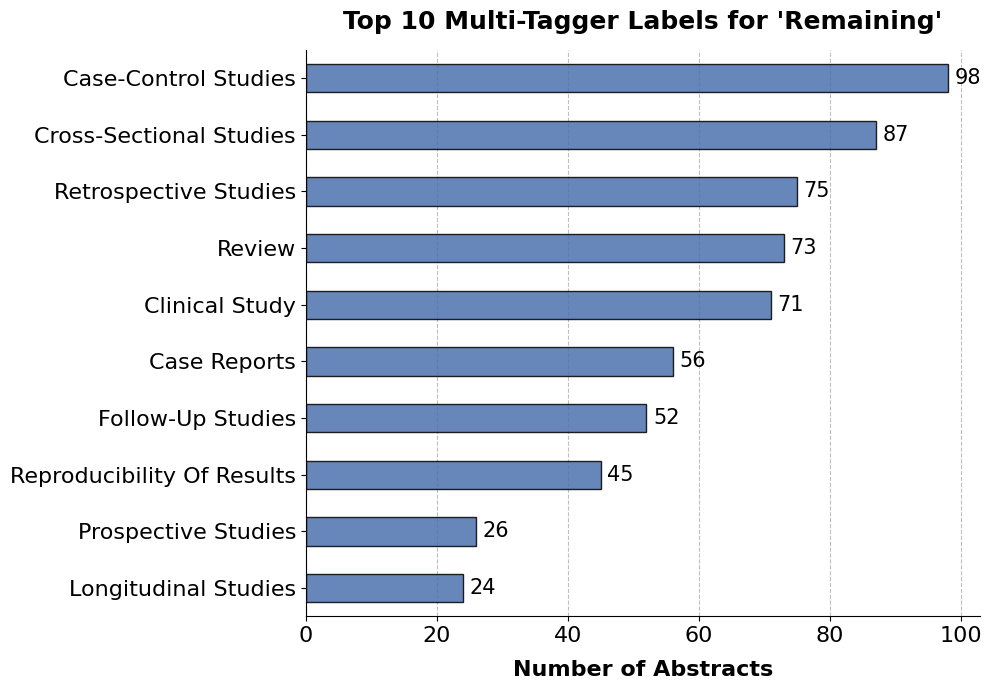

In [647]:
plot_top_labels(df_predictions_stt_remaining, 'labels_multitagger', top_n=10,  title="Top 10 Multi-Tagger Labels for 'Remaining'", save=True)

In [651]:
merged_sdd_mt.head()

,PMID,labels_multitagger,idx,journal_name,title,abstract,accepted_label,multi_label,binary_label
0,26081580,"Clinical Study,\n Randomized Controlled Trial",515,BMC Psychiatry,Narrative exposure therapy for immigrant child...,BACKGROUND: Millions of children worldwide suf...,Clinical-study-protocol,12,0
1,25971300,Retrospective Studies,1057,Journal of the National Cancer Institute,FGL2 as a Multimodality Regulator of Tumor-Med...,Fibrinogen-like protein 2 (FGL2) may promote g...,Animal-drug-intervention,6,1
2,25978940,Cross-Sectional Studies,596,European journal of paediatric neurology : EJP...,Pain in adolescents with spinal muscular atrop...,The purpose of this study was to explore the p...,Remaining,0,0
3,25867960,Clinical Study,1391,J Vis Exp,The forced swim test as a model of depressive-...,The goal of the present protocol is to describ...,Animal-other,5,1
4,25856530,Case Reports,350,Cochlear implants international,Improving behavior using child-directed intera...,Children with hearing loss (HL) are at increas...,Human-non-RCT-non-drug-intervention,2,0


## RCTs

In [693]:
merged_sdd_mt_RCT = merged_sdd_mt[merged_sdd_mt['labels_multitagger'].astype(str).str.contains('Randomized Controlled Trial', case=False, na=False)]
merged_sdd_mt_RCT.shape

(289, 9)

/var/folders/nd/2fzvhsh510gbt9x6z5pdb1gr0000gn/T/ipykernel_5833/2563942738.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_sdd_mt_RCT['labels_multitagger'] = merged_sdd_mt_RCT['labels_multitagger'].str.replace("\n Randomized Controlled Trial", " RCT")
/var/folders/nd/2fzvhsh510gbt9x6z5pdb1gr0000gn/T/ipykernel_5833/2563942738.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_sdd_mt_RCT['labels_multitagger'] = merged_sdd_mt_RCT['labels_multitagger'].str.replace("Randomized Controlled Trial

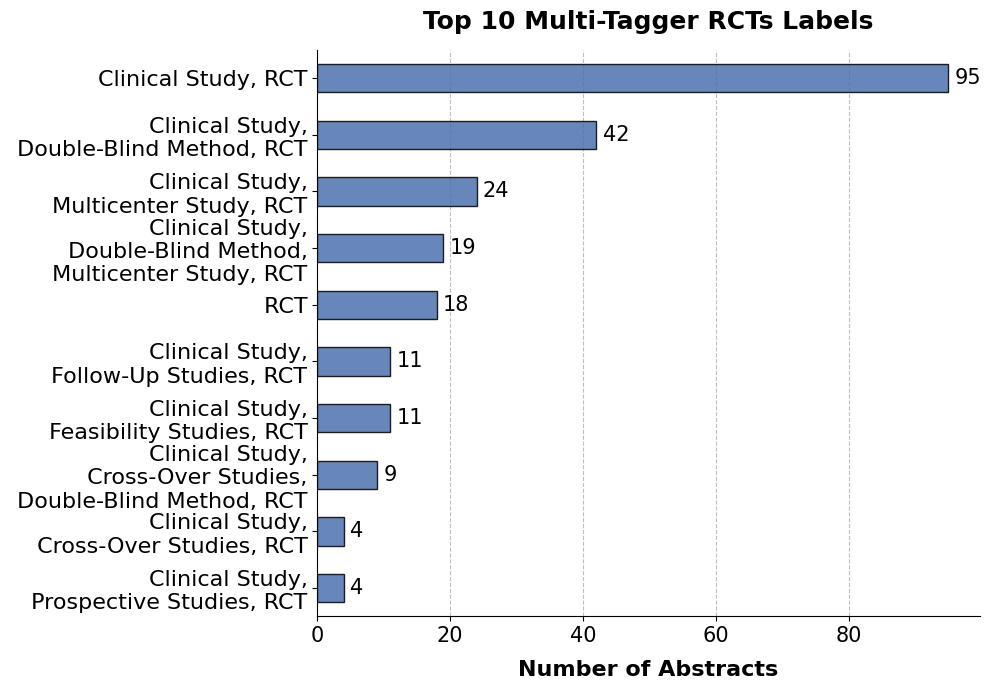

In [703]:
merged_sdd_mt_RCT['labels_multitagger'] = merged_sdd_mt_RCT['labels_multitagger'].str.replace("\n Randomized Controlled Trial", " RCT")
merged_sdd_mt_RCT['labels_multitagger'] = merged_sdd_mt_RCT['labels_multitagger'].str.replace("Randomized Controlled Trial", " RCT")

plot_top_labels(merged_sdd_mt_RCT, 'labels_multitagger', top_n=10,  title="Top 10 Multi-Tagger RCTs Labels", save=True)

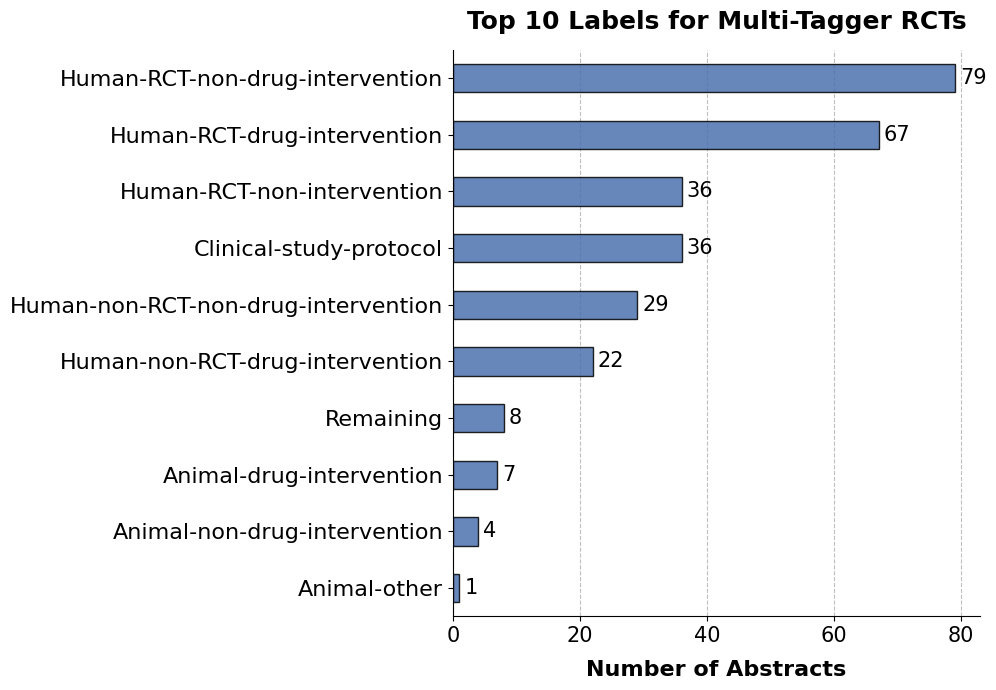

In [705]:
plot_top_labels(merged_sdd_mt_RCT, 'accepted_label', top_n=10,  title="Top 10 Labels for Multi-Tagger RCTs", save=True)

## Remaining-human

In [562]:
df_predictions_stt_remaining_human = pd.read_csv("data/multi_tagger/stt_data_remaining_gs_human.csv")
df_predictions_stt_remaining_human.rename(columns={'pmid': 'PMID'}, inplace=True)
df_predictions_stt_remaining_human.shape

(263, 10)

In [564]:
merged_stt_gs_mtagger = pd.merge(df_predictions_stt_remaining_human, merged_sdd_mt[['PMID','labels_multitagger']], how="left", on="PMID")
merged_stt_gs_mtagger.shape

(263, 11)

In [566]:
merged_stt_gs_mtagger.head()

,Unnamed: 0,idx,PMID,journal_name,title,abstract,accepted_label,multi_label,binary_label,labels_gs,labels_multitagger
0,94,95,3206055,Sleep,The effect of total sleep deprivation on plasm...,Twelve healthy volunteers were included in thi...,Remaining,0,0,human,Evaluation Study
1,96,97,19728219,Journal of psychosomatic obstetrics and gynaec...,Lifetime physical and sexual abuse and the ris...,Despite the growing body of evidence on the si...,Remaining,0,0,human,"Cross-Sectional Studies,\n Longitudinal Studies"
2,99,100,11904752,Acta neuropathologica,Vascular fibrosis and calcification in the hip...,Study of the hippocampal formation of 82 subje...,Remaining,0,0,human,Cohort Studies
3,109,110,28627925,Experimental and clinical psychopharmacology,Will delay discounting predict intention to qu...,Intention to quit cigarette smoking is signifi...,Remaining,0,0,human,Cross-Sectional Studies
4,112,113,8264869,Neuroendocrinology,Alpha-melanocyte-stimulating hormone is presen...,"Plasma ACTH, beta-endorphin and alpha-melanocy...",Remaining,0,0,human,Clinical Study


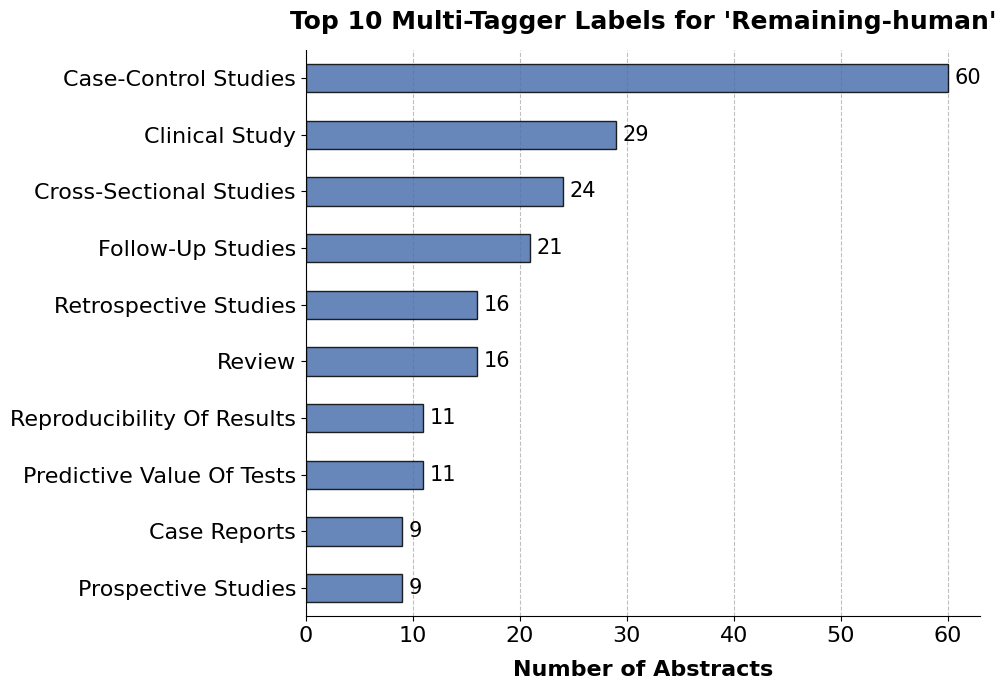

In [568]:
plot_top_labels(merged_stt_gs_mtagger, 'labels_multitagger', top_n=10,  title="Top 10 Multi-Tagger Labels for 'Remaining-human'", save=True)